This notebook gives some example for calculating the magnetic fields and gradients using the Functions defined in field.py

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import fields as f

import fields_plot as fp
import nv_optical_response as nv
import nv_analysis as nv_anal

# from b26_toolkit.src.data_analyis import nv_optical_properties as nv

import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib 
# setup font styles for figures
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight' : 'normal'}
matplotlib.rcParams.update(params)

# widget for progess
from ipywidgets import FloatProgress
from IPython.display import display

from mpl_toolkits.axes_grid1 import make_axes_locatable

## Info

to get infos about the functions, call help:

In [2]:
?f.calc_B_field_single_dipole #  this code 
?f.gradient #  general code that allows to have multiple dipoles and multiple positions

## define the general parameters

In [3]:
#     a: radius in um
#     Br: surface magnetization in Teslas
#     phi_m: polar angle in deg / phi = 0 and theta = 90 along x
#     theta_m: azimuthal angle in deg
#     d_bead_z: distance top of bead to NV plane
#     mu_0: vacuum permeability ( T m /A)
#     d_bead_z: distance between bead and z plane
#     dx: distance between points (in um)
#     x_min, x_max, y_min, y_max: plot dimensions (in um)

p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
#     ,
#     'exclude_ring' : 1
}

# f.p_2

# 1.) Some simple examples

## 1.1) plot total magnetic field - single dipole

/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:77: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:79: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:80: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)


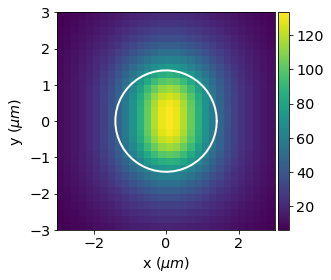

In [6]:
data = f.calc_B_field_single_dipole(p)
fig = plt.figure()
ax = fp.plot_Bfield_mag(data, title ='total magnetic field')
fp.plot_ring(p['a'], ax)
# save figure
# fig.savefig('data/'+f.p_to_filename(p) + 'total_field.png')

## 1.2) gradient along single NV

/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:77: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:79: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:80: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)


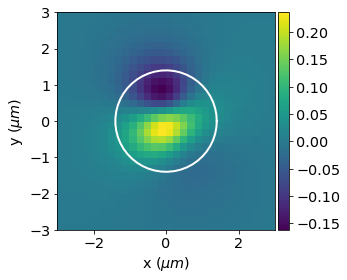

In [7]:

nv_id =1 # select a NV [1,2,3,4]
# for nv_id in [1,2,3, 4]:

s= nv.nNV[nv_id-1] # NV orientation 
n = [0,0,1] # direction of gradient

data = f.calc_Gradient_single_dipole(p, s, n)

ax = fp.plot_NV_property_map(data, prop='G', title ='magnetic field gradient NV{:0d} along z'.format(nv_id))
fp.plot_ring(p['a'], ax)
# fig = fp.plot_G(data, title ='magnetic field gradient NV{:0d} along z'.format(nv_id))

# 1.3) plot fields on a ring

In [5]:

p = {
    'a' : 1.4,
    'Br' : 0.31666357,
    'muo' : 4 * np.pi * 1e-7,
}

dz = 0 # distane between diamond and magnet in um
radius_nvs = 3.2 # radius of NV measurements in um
DipolePosition = np.array([0,0,0])
phi_m = 15 # angle of magnetic dipole
theta_m = 89 # angle of magnetic dipole
2630008

m = f.magnetic_moment(**p)*np.array([np.cos(phi_m*np.pi/180)*np.sin(theta_m*np.pi/180),
                                     np.sin(phi_m*np.pi/180)*np.sin(theta_m*np.pi/180),
                                    np.cos(theta_m*np.pi/180)])



phi = np.linspace(0, 2*np.pi, 50)
zo = p['a']+dz
# calculate the positions
x = radius_nvs*np.cos(phi)
y = radius_nvs*np.sin(phi)
# Nx, Ny = len(x), len(y)
# X, Y = np.meshgrid(x, y)

r = np.array([x, y, zo * np.ones(len(x))]).T

B = f.b_field_single_dipole(r, DipolePosition, m)

Text(0,0.5,'total field (mT)')

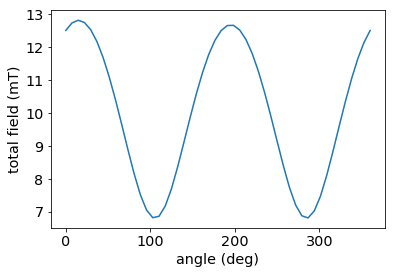

In [6]:
plt.plot(phi*180/np.pi, 1e3*np.linalg.norm(B,axis=1))
plt.xlabel('angle (deg)')
plt.ylabel('total field (mT)')

## 1.4) optimize the gradient along z while keeping the xy gradient low - dipole along y

/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:77: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:79: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:80: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)


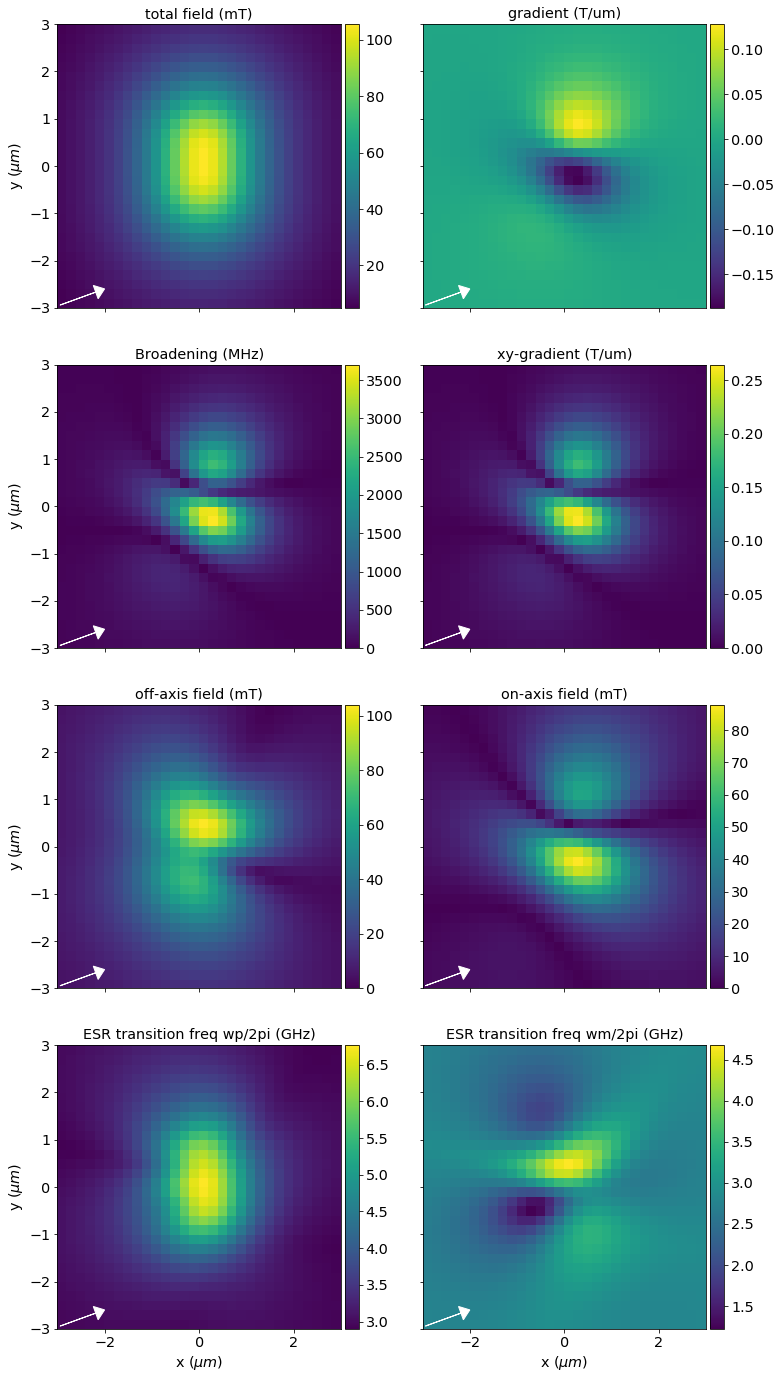

In [9]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
}


nv_id = 0
n = [0,0,1]

max_broadening = 100 # in MHz
max_off_axis_field = 0.01 # in Teslas
df = nv_anal.get_full_nv_dataset(p, nv_id=nv_id, n=n)

# plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
plot_types = ['Bmag', 'G', 'shift', 'Gxy', 'Bperp', 'Bpar', 'fp', 'fm']
rows = int(np.ceil(len(plot_types)/2.))

fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 24))

for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
#     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
#                                       plot=True, plot_prop=plot_type)
    ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
    x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)
    
    fp.plot_arrow(x, ax)
    
# remove labels
for j in range(len(axis)-1):
    for i in [0,1]:
        axis[j,i].set_xlabel('')

for i in range(len(axis)):
    axis[i,1].set_ylabel('')

## 1.5) optimize the gradient along z while keeping the xy gradient low - dipole along z

/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:77: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:79: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:80: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)


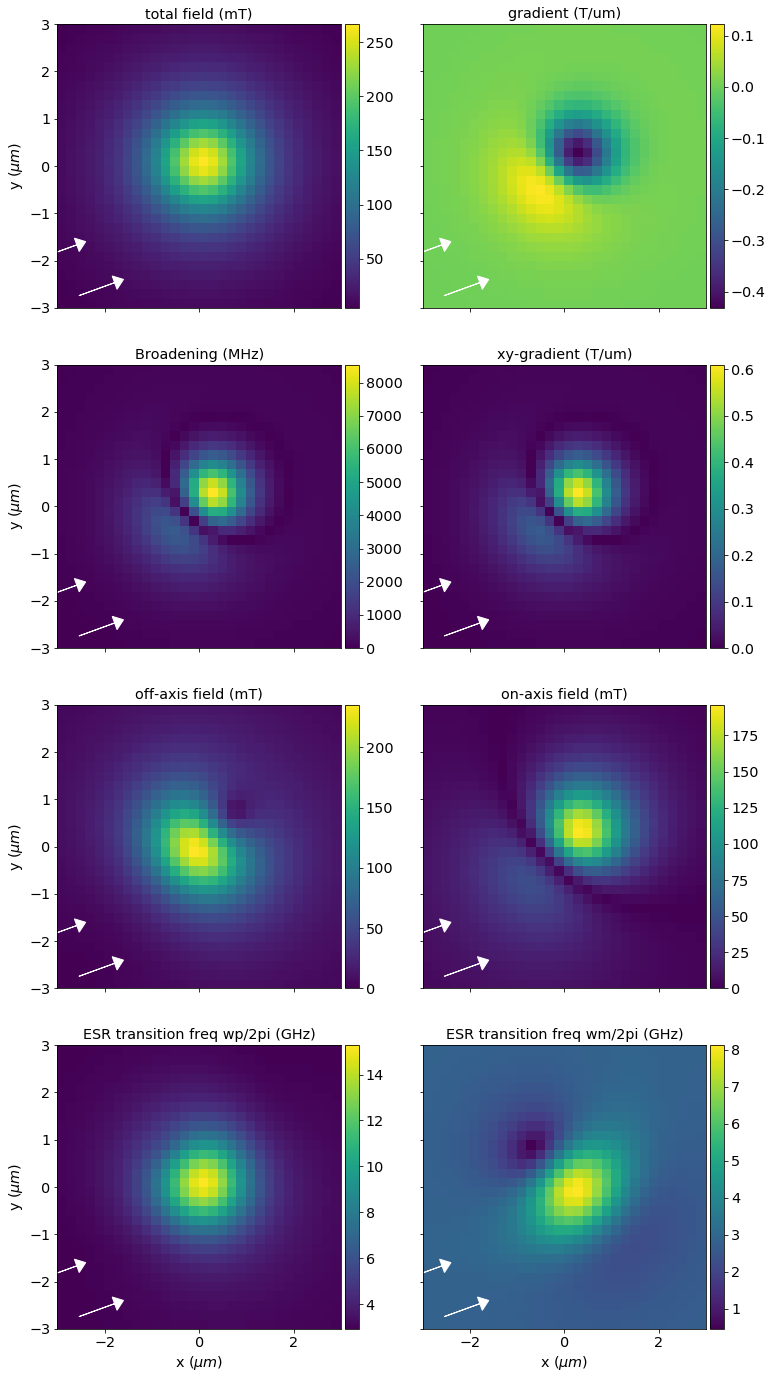

In [10]:

p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 180,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
}


nv_id = 0
n = [0,0,1]

max_broadening = 100 # in MHz
max_off_axis_field = 0.01 # in Teslas
df = nv_anal.get_full_nv_dataset(p, nv_id=nv_id, n=n)

# plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
plot_types = ['Bmag', 'G', 'shift', 'Gxy', 'Bperp', 'Bpar', 'fp', 'fm']
rows = int(np.ceil(len(plot_types)/2.))

fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 24))

for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
#     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
#                                       plot=True, plot_prop=plot_type)
    ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
    x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)
    
    fp.plot_arrow(x, ax)
    
# remove labels
for j in range(len(axis)-1):
    for i in [0,1]:
        axis[j,i].set_xlabel('')

for i in range(len(axis)):
    axis[i,1].set_ylabel('')

## 1.6.) optimize the gradient along z while keeping the xy gradient low - dipole along y -rotate NV

/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:77: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:79: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:80: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)


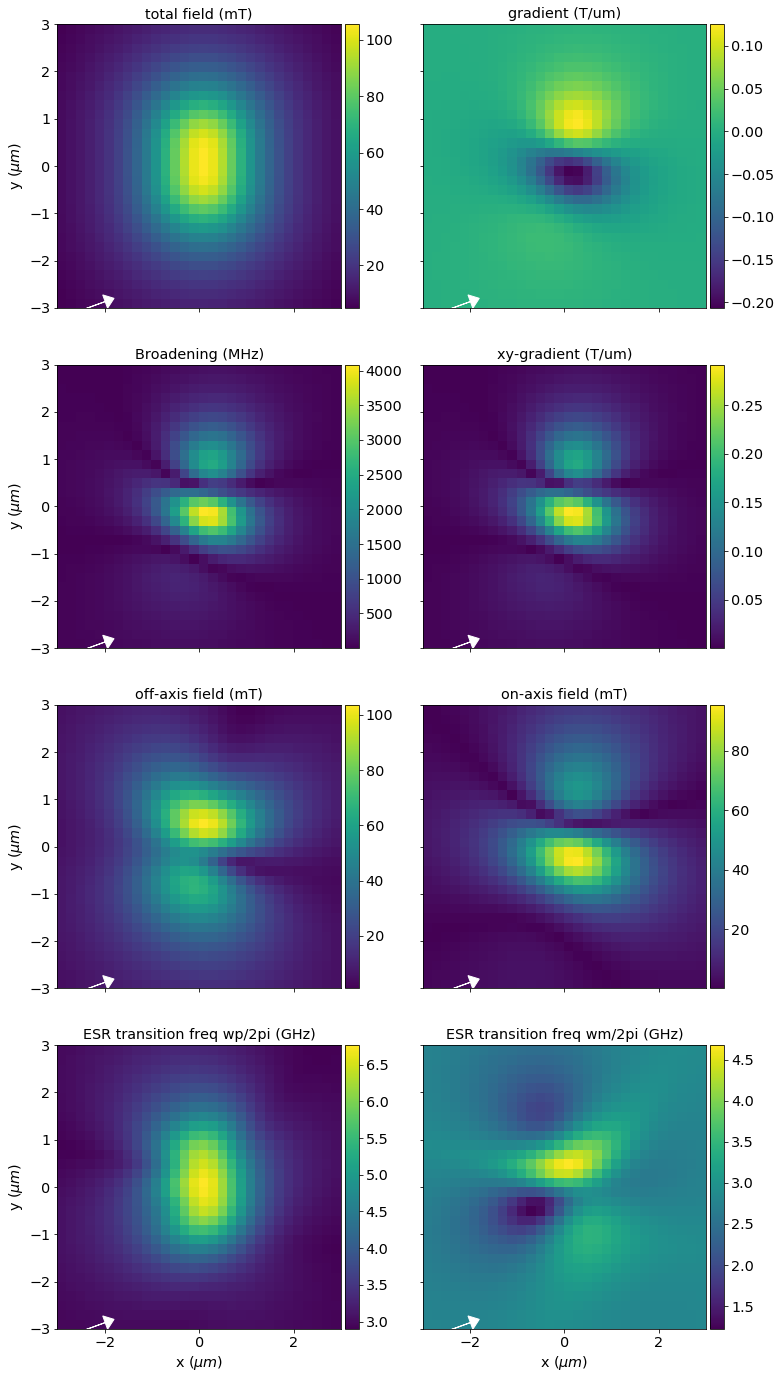

In [11]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
}


nv_id = 0
n = [0,0,1]

nv_rot = 15.27564388 # rotation of diamond in deg

nv_rot = nv_anal.rotation_matrix_z(nv_rot)

max_broadening = 100 # in MHz
max_off_axis_field = 0.01 # in Teslas
df = nv_anal.get_full_nv_dataset(p, nv_id=nv_id, nv_rotation_matrix = nv_rot, n=n)

# plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
plot_types = ['Bmag', 'G', 'shift', 'Gxy', 'Bperp', 'Bpar', 'fp', 'fm']
rows = int(np.ceil(len(plot_types)/2.))

fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 24))

for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
#     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
#                                       plot=True, plot_prop=plot_type)
    ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
    x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)
    
    fp.plot_arrow(x, ax)
    
# remove labels
for j in range(len(axis)-1):
    for i in [0,1]:
        axis[j,i].set_xlabel('')

for i in range(len(axis)):
    axis[i,1].set_ylabel('')

## 1.7) magnetize along a nv axis

NV parallel to magnet!


/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:77: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:79: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:80: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)


,G,x,y,z,Gxy,Broadening,Bpar,Bperp,Bmag,fm,fp
699,0.053205,0.4,1.4,1.4,0.075243,1053.401565,0.054441,0.003898,0.054581,3.329059e+09,4.294382e+09


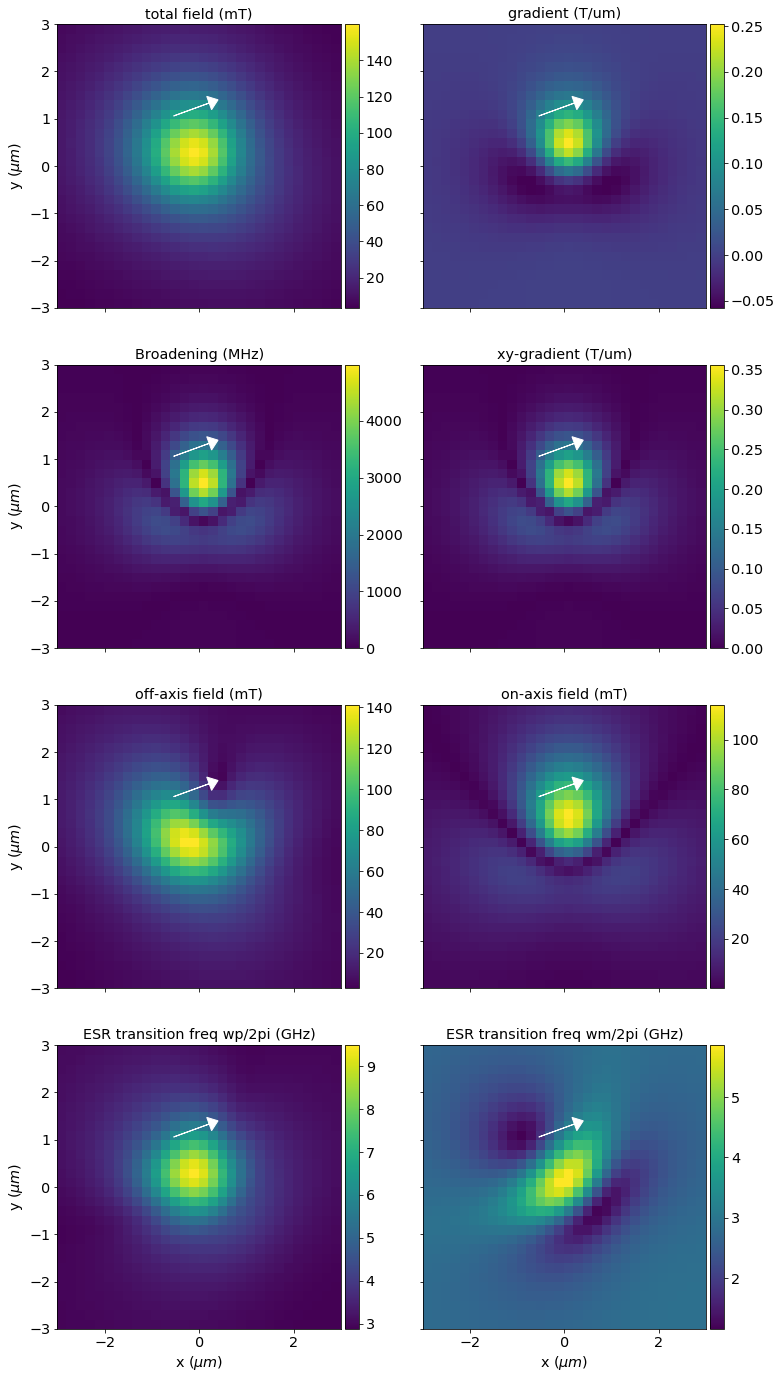

In [12]:

p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : -45,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':3
}


nv_id = 0
n = [0,0,1]

nv_rot = 0 # rotation of diamond in deg

nv_rot = nv_anal.rotation_matrix_z(nv_rot)

max_broadening = 100000000 # in MHz
max_off_axis_field = 0.005 # in Teslas


# === begin script =======

# check that magnet is parallel to nv 
r, m = f.p_to_positions(p)
m/=np.linalg.norm(m)
s = nv.nNV[nv_id]
if np.linalg.norm(np.cross(s, m))>1e-15:
    print('Warning NV not parallel to magnet')
else:
    print('NV parallel to magnet!')

df = nv_anal.get_full_nv_dataset(p, nv_id=nv_id, nv_rotation_matrix = nv_rot, n=n)

# plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
plot_types = ['Bmag', 'G', 'shift', 'Gxy', 'Bperp', 'Bpar', 'fp', 'fm']
rows = int(np.ceil(len(plot_types)/2.))

fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 24))

for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
#     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
#                                       plot=True, plot_prop=plot_type)
    ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
    x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)
    
    fp.plot_arrow(x, ax)
    
# remove labels
for j in range(len(axis)-1):
    for i in [0,1]:
        axis[j,i].set_xlabel('')

for i in range(len(axis)):
    axis[i,1].set_ylabel('')
x

In [10]:
nv.esr_frequencies( np.array([0.065569,0,  0.009381]))

array([  3.71204487e+09,   4.71932964e+09])

In [11]:
nv.esr_frequencies( np.array([0, 0.065569,  0.009381]))

array([  3.71204487e+09,   4.71932964e+09])

# 2.) find the optimal angle -  do the calculation - this might take a long time!

In [3]:
def plot_gradient_map(theta_mag, phi_diamond, G, ax, diamond111_nv_id = None, cmap_name = None,plot_nv_angles = True):

    fig = ax.get_figure()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)

    if cmap_name is not None:
        im = ax.pcolormesh(theta_mag, phi_diamond, G, cmap=plt.get_cmap(cmap_name))
    else:
        im = ax.pcolormesh(theta_mag, phi_diamond, G)
    fig.colorbar(im, cax=cax, orientation='vertical')

    ax.set_xlim(np.min(theta_mag), np.max(theta_mag))
    ax.set_ylim(np.min(phi_diamond), np.max(phi_diamond))

    ax.set_xlabel('theta (deg)')
    ax.set_ylabel('phi (deg)')
    ax.set_title('NV{:d} gradient (T/um)'.format(nv_id))
    
    s = nv.nNV[nv_id]
    
    if diamond111_nv_id is not None:
        assert diamond111_nv_id in range(4)
        nv_rot = nv_anal.rotation_matrix_100_to_111(diamond111_nv_id)
        s = np.dot(nv_rot, s)


    if plot_nv_angles:
        nv_angle_theta = np.arctan2(np.sqrt(s[0]**2+s[1]**2),s[2])*180/np.pi
        nv_angle_phi = np.arctan2(s[0], s[1])*180/np.pi
        nv_angle_phi = nv_angle_phi+360 if nv_angle_phi<0 else nv_angle_phi
        print('nv_angle_phi', nv_angle_phi)
        print('nv_angle_theta', nv_angle_theta)
        ax.plot([nv_angle_theta, nv_angle_theta], [np.min(phi_diamond), np.max(phi_diamond)], '--w', lw = 3)
        ax.plot([np.min(theta_mag), np.max(theta_mag)], [nv_angle_phi, nv_angle_phi], '--w', lw = 3)
    # ax.set_aspect('equal')
    # ax.set_aspect(0.5)
    return ax

In [4]:
def nv_angles(nv_id, diamond111_nv_id = None):
    """
    returns the angles that describe the orientation of the NV
    """
    s = nv.nNV[nv_id]
    
    if diamond111_nv_id is not None:
        assert diamond111_nv_id in range(4)
        nv_rot = nv_anal.rotation_matrix_100_to_111(diamond111_nv_id)
        s = np.dot(nv_rot, s)

    nv_angle_theta = np.arctan2(np.sqrt(s[0]**2+s[1]**2),s[2])*180/np.pi
    nv_angle_phi = np.arctan2(s[0], s[1])*180/np.pi
    nv_angle_phi = nv_angle_phi+360 if nv_angle_phi<0 else nv_angle_phi
    
    return nv_angle_phi, nv_angle_theta

## 2.1) NVs in 100 (standard) diamond 

#### single NV - max off axis field 10mT

A Jupyter Widget

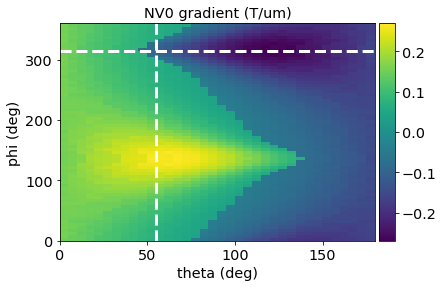

In [9]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':2
}


nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 0.01 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in range(1):
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm)
            f.value += 1 # update progress
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT.csv'.format(nv_id, max_off_axis_field*1e3))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT.jpg'.format(nv_id, max_off_axis_field*1e3))
    f.description = 'figure saved!'

#### single NV - max off axis field 5mT

A Jupyter Widget

[ 0.57735027 -0.57735027  0.57735027]
[ 0.57735027 -0.57735027  0.57735027]
nv_angle_phi 135.0
nv_angle_theta 54.7356103172


A Jupyter Widget

[ 0.57735027  0.57735027 -0.57735027]
[ 0.57735027  0.57735027 -0.57735027]
nv_angle_phi 45.0
nv_angle_theta 125.264389683


A Jupyter Widget

[-0.57735027 -0.57735027 -0.57735027]
[-0.57735027 -0.57735027 -0.57735027]
nv_angle_phi 225.0
nv_angle_theta 125.264389683


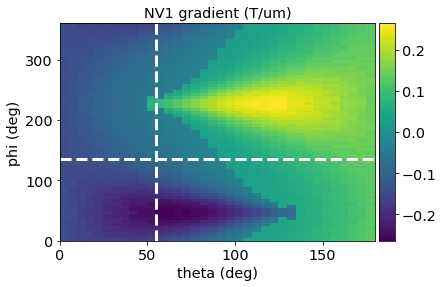

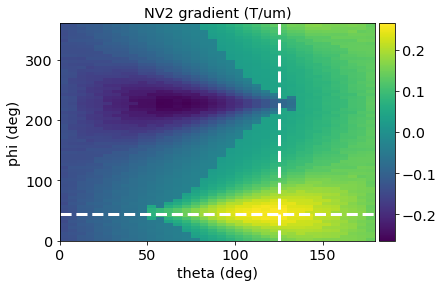

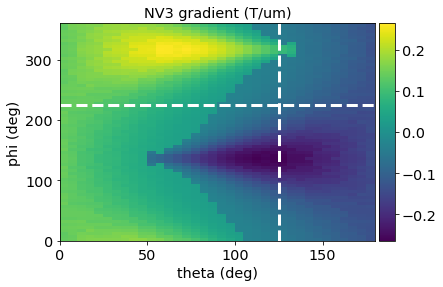

In [98]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':2
}


nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 5e-3 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in [1,2,3]:
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm)
            f.value += 1 # update progress
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT.csv'.format(nv_id, max_off_axis_field*1e3))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT.jpg'.format(nv_id, max_off_axis_field*1e3))
    f.description = 'figure saved!'

#### single NV - max off axis field 5mT - exclude positions on ring

In [ ]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':3
}


nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 5e-3 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in [0]:
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm, exclude_ring = p['a'], verbose = True)
            f.value += 1 # update progress
#             f.description = '{:02.1f}%'.format(100.*f/len(theta_mag)*len(phi_diamond))
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT.csv'.format(nv_id, max_off_axis_field*1e3))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_exclude_mag.jpg'.format(nv_id, max_off_axis_field*1e3))
    f.description = 'figure saved!'

A Jupyter Widget

#### ensemble NV - max off axis field 5mT, max broadening 50MHz

A Jupyter Widget

[-0.57735027  0.57735027  0.57735027]
[-0.57735027  0.57735027  0.57735027]


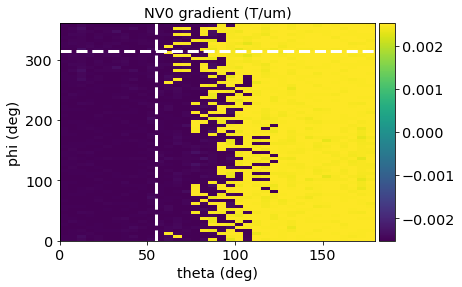

In [21]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.25,
    'xmax':10
}


nv_id = 0
n = [0,0,1]

max_broadening = 50 # in MHz
max_off_axis_field = 5e-3 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in range(1):
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm)
            f.value += 1 # update progress
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_maxBroad_{:03.0f}MHz.csv'.format(nv_id, max_off_axis_field*1e3, max_broadening))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_maxBroad_{:03.0f}MHz.jpg'.format(nv_id, max_off_axis_field*1e3, max_broadening))
    f.description = 'figure saved!'

## 2.2) NVs in 111 (hard to get) diamond 

#### single NV - max off axis field 5mT

A Jupyter Widget

NameError: name 'plot_gradient_map' is not defined

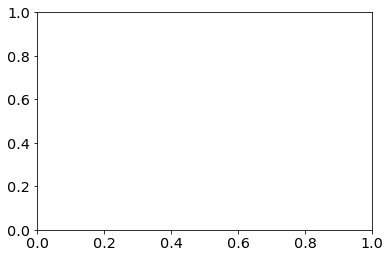

In [3]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':2
}


nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 0.01 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in range(1):
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm, diamond111_nv_id = 0)
            f.value += 1 # update progress
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_111type.csv'.format(nv_id, max_off_axis_field*1e3))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax diamond111_nv_id = nv_id)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_111type.jpg'.format(nv_id, max_off_axis_field*1e3))
    f.description = 'figure saved!'

#### ensemble NV - max off axis field 5mT, max broadening 50MHz

A Jupyter Widget

[-0.57735027  0.57735027  0.57735027]
[ -5.55111512e-17  -6.91178734e-17   1.00000000e+00]


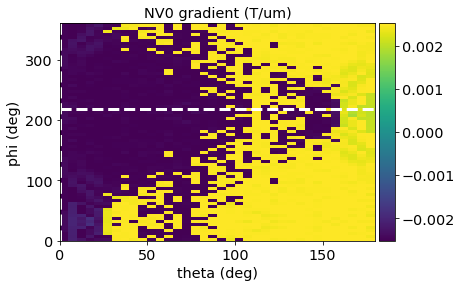

In [24]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.25,
    'xmax':10
}


nv_id = 0
n = [0,0,1]

max_broadening = 50 # in MHz
max_off_axis_field = 5e-3 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

for nv_id in range(1):
    # define progress bar
    f = FloatProgress(min=0, max=len(theta_mag)*len(phi_diamond), description = 'calculating gradients NV{:d}...'.format(nv_id))
    display(f)
    # preallocate gradient array
    G = np.zeros([len(phi_diamond), len(theta_mag)])
    for r, phid in enumerate(phi_diamond):
        for c, tm in enumerate(theta_mag):
            G[r, c] = nv_anal.calc_max_gradient(p, nv_id, n, max_broadening, max_off_axis_field, phid, tm, diamond111_nv_id = 0)
            f.value += 1 # update progress
    #print('done!')
    df = pd.DataFrame(G)
    df.to_csv('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_maxBroad_{:03.0f}MHz_111type.csv'.format(nv_id, max_off_axis_field*1e3, max_broadening))
    f.description ='data saved!'
    fig, ax = plt.subplots()
    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax, diamond111_nv_id = nv_id)
    fig.savefig('images/gradient_maps_vary_angles_NV{:d}_maxOffField_{:0.02f}mT_maxBroad_{:03.0f}MHz_111type.jpg'.format(nv_id, max_off_axis_field*1e3, max_broadening))
    f.description = 'figure saved!'

# 3.) find optimal angle - don't redo calculation but just load previous data

## 3.1) Replot maps for single NVs

nv_angle_phi 315.0
nv_angle_theta 54.7356103172
nv_angle_phi 135.0
nv_angle_theta 54.7356103172
nv_angle_phi 45.0
nv_angle_theta 125.264389683
nv_angle_phi 225.0
nv_angle_theta 125.264389683


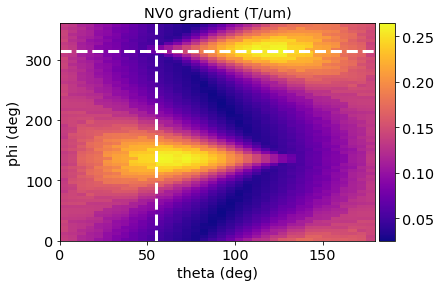

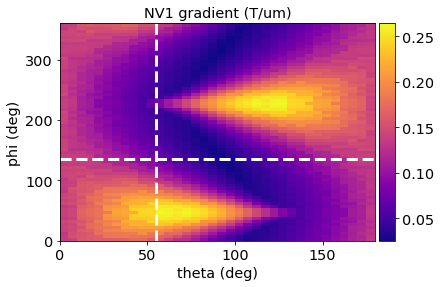

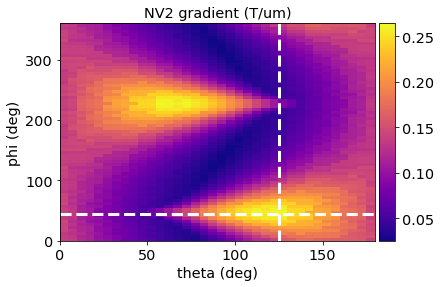

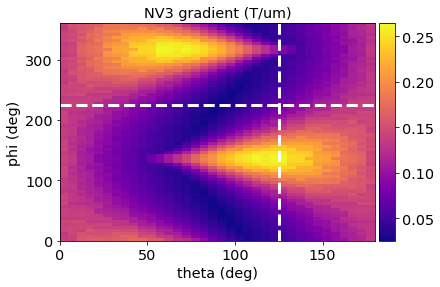

In [135]:
# load and replot
absG = True # True or False, to plot either G or abs(G)
diamond111_nv_id = None # or None if 0 111 type els normal 100 type
# diamond111_nv_id = None # or None if 0 111 type els normal 100 type
cmap_name = 'plasma'

for nv_id in range(4):
    filename = 'gradient_maps_vary_angles_NV{:d}_maxOffField_5.00mT'.format(nv_id)


    df = pd.read_csv('images/{:s}.csv'.format(filename))
    theta_mag = np.linspace(0, 180, 2*18+1)
    phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg
    G = df.as_matrix()
    G = G[:,1:]


    # print('theta_mag', theta_mag)
    # print('phi_diamond', phi_diamond)
    if absG:
        G= np.abs(G)

    fig, ax = plt.subplots()

    ax = plot_gradient_map(theta_mag, phi_diamond, G, ax, cmap_name =cmap_name, diamond111_nv_id = diamond111_nv_id)


    # plt.gcf().subplots_adjust(bottom=0.15)
    fig.savefig('images/{:s}.png'.format(filename), transparent=True, bbox_inches="tight")

#### uncomment the respective filename

nv_angle_phi 218.769251298
nv_angle_theta 5.07925335041e-15


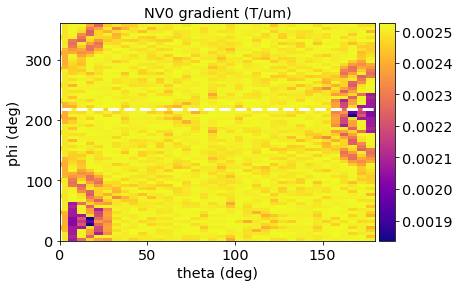

In [134]:
# load and replot
filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT_maxBroad_050MHz_111type'
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT_maxBroad_050MHz_111type'
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT_maxBroad_050MHz'
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT_maxBroad_050MHz'
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT'
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_10.00mT_111type'
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_10.00mT'

absG = True # True or False, to plot either G or abs(G)
diamond111_nv_id = 0 # or None if 0 111 type els normal 100 type
# diamond111_nv_id = None # or None if 0 111 type els normal 100 type
cmap_name = 'plasma'
nv_id = 0
df = pd.read_csv('images/{:s}.csv'.format(filename))
theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg
G = df.as_matrix()
G = G[:,1:]


# print('theta_mag', theta_mag)
# print('phi_diamond', phi_diamond)
if absG:
    G= np.abs(G)

fig, ax = plt.subplots()

ax = plot_gradient_map(theta_mag, phi_diamond, G, ax, cmap_name =cmap_name, diamond111_nv_id = diamond111_nv_id)


# plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig('images/{:s}.png'.format(filename), transparent=True, bbox_inches="tight")

#### plot for all 4 families

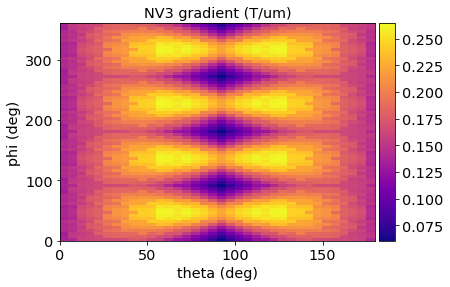

In [117]:
diamond111_nv_id = 0 # or None if 0 111 type else normal 100 type
absG = False # True or False, to plot either G or abs(G)
# load and replot

for nv_id in range(4):
    filename = 'gradient_maps_vary_angles_NV{:d}_maxOffField_5.00mT'.format(nv_id)

    

    cmap_name = 'plasma'

    df = pd.read_csv('images/{:s}.csv'.format(filename))
    theta_mag = np.linspace(0, 180, 2*18+1)
    phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg
    Gtmp = df.as_matrix()
    Gtmp = Gtmp[:,1:]
    
    if nv_id == 0:
        G = Gtmp
    else:
        # pick the max
        G = np.array([np.max([np.abs(x1), np.abs(x2)]) for x1, x2 in zip(G.flatten(), Gtmp.flatten())]).reshape(np.shape(G))
#         G = np.array([[x1, x2][np.argmax([np.abs(x1), np.abs(x2)])] for x1, x2 in zip(G.flatten(), Gtmp.flatten())]).reshape(np.shape(G))


    # print('theta_mag', theta_mag)
    # print('phi_diamond', phi_diamond)
    if absG:
        G= np.abs(G)

fig, ax = plt.subplots()

ax = plot_gradient_map(theta_mag, phi_diamond, G, ax, cmap_name =cmap_name,
                       diamond111_nv_id = diamond111_nv_id, plot_nv_angles=False)


    # plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig('images/gradient_maps_vary_angles_allNV_maxOffField_5.00mT.png'.format(filename), transparent=True, bbox_inches="tight")

In [109]:
a = np.array(
[[1,2],
[3,1],
[3,1]]
)
b = np.array(
[[2,1],
[2,1],
[3,2]]
)




# for x1, x2 in zip(a.flatten(), b.flatten()):
#     print(np.max([x1, x2]))
# #     print(x1, x2)

array([[2, 2],
       [3, 1],
       [3, 2]])

## 3.2) look at cross cuts

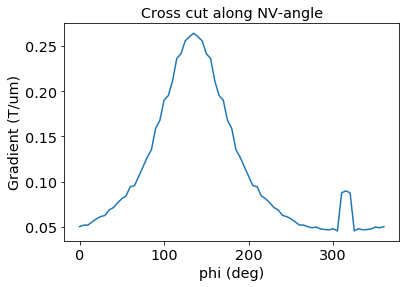

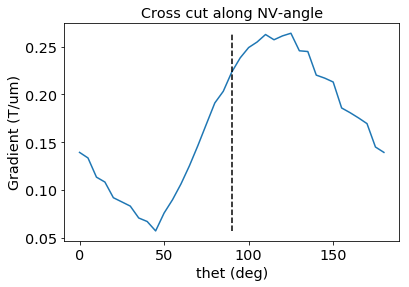

In [139]:
# load and replot
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT_maxBroad_050MHz_111type'
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT_maxBroad_050MHz_111type'
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT_maxBroad_050MHz'
# filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT_maxBroad_050MHz'
filename = 'gradient_maps_vary_angles_NV0_maxOffField_5.00mT'

absG = True # True or False, to plot either G or abs(G)

cmap_name = 'plasma'

df = pd.read_csv('images/{:s}.csv'.format(filename))
theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg
G = df.as_matrix()
G = G[:,1:]


# print('theta_mag', theta_mag)
# print('phi_diamond', phi_diamond)
if absG:
    G= np.abs(G)


nv_phi, nv_theta = nv_angles(nv_id, diamond111_nv_id = None)
nv_phi, nv_theta

# ====== cross cut phi ===========
fig = plt.figure()
# get the index that is closest to the nv angle
index = np.argmin(np.abs(theta_mag-nv_theta))
plt.plot(phi_diamond, G[:,index])

plt.xlabel('phi (deg)')
plt.ylabel('Gradient (T/um)')
plt.title('Cross cut along NV-angle')
fig.savefig('images/{:s}_cross_cut_phi.png'.format(filename), transparent=True, bbox_inches="tight")


# ====== cross cut phi ===========
fig = plt.figure()
# get the index that is closest to the nv angle
index = np.argmin(np.abs(phi_diamond-nv_phi))
plt.plot(theta_mag, G[index, :])
plt.plot([90,90],[min(G[index, :]),max(G[index, :])], 'k--')

plt.xlabel('thet (deg)')
plt.ylabel('Gradient (T/um)')
plt.title('Cross cut along NV-angle')
fig.savefig('images/{:s}_cross_cut_theta.png'.format(filename), transparent=True, bbox_inches="tight")



### plot in a 3D plot - not really used

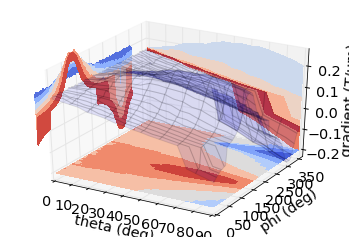

In [67]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(theta_mag, phi_diamond)

# Plot the 3D surface
ax.plot_surface(X, Y, G, rstride=2, cstride=2, alpha=0.1)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
# cset = ax.contourf(X, Y, G, zdir='z', offset=-100, cmap=cm.coolwarm)
# cset = ax.contourf(X, Y, G, zdir='x', offset=-40, cmap=cm.coolwarm)
# cset = ax.contourf(X, Y, G, zdir='y', offset=40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, G, zdir='z', offset=-0.2, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, G, zdir='x', offset=-10, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, G, zdir='y', offset=360, cmap=cm.coolwarm)


ax.set_xlim(np.min(X), np.max(X))
ax.set_ylim(np.min(Y), np.max(Y))
ax.set_zlim(np.min(G), np.max(G))

ax.set_xlabel('theta (deg)')
ax.set_ylabel('phi (deg)')
ax.set_zlabel('gradient (T/um)')

plt.show()

# 4.) detailed look at specific angles

In [25]:
#vertical plots
def plot_for_certain_angles(theta_magnet, phi_diamond, p, nv_id, n, max_broadening, max_off_axis_field, diamond111_nv_id = None):
    p2= p
    p2['theta_m'] = theta_magnet

    nv_rot = nv_anal.rotation_matrix_z(phi_diamond)

    if diamond111_nv_id is not None:
        assert diamond111_nv_id in range(4)
        nv_rot = nv_anal.rotation_matrix_100_to_111(diamond111_nv_id)

    df = nv_anal.get_full_nv_dataset(p2, nv_id=nv_id, n=n, nv_rotation_matrix = nv_rot)


    # plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
    plot_types = ['Bmag', 'G', 'Bperp', 'Bpar', 'fp', 'fm']
    rows = int(np.ceil(len(plot_types)/2.))

    fig, axis = plt.subplots(rows, 2, sharex=True, sharey=True, figsize = (12, 18))

    for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
    #     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
    #                                       plot=True, plot_prop=plot_type)
        ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax)
        x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)

        fp.plot_arrow(x, ax)

    # remove labels
    for j in range(len(axis)-1):
        for i in [0,1]:
            axis[j,i].set_xlabel('')

    for i in range(len(axis)):
        axis[i,1].set_ylabel('')
        
    return x

In [4]:
#horizontal plots
def plot_for_certain_angles(theta_magnet, phi_diamond, p, nv_id, n, max_broadening, max_off_axis_field,
                            diamond111_nv_id = None, cmap_name = None):
    p2= p
    p2['theta_m'] = theta_magnet

    nv_rot = nv_anal.rotation_matrix_z(phi_diamond)
    if diamond111_nv_id is not None:
        assert diamond111_nv_id in range(4)
        nv_rot = nv_anal.rotation_matrix_100_to_111(diamond111_nv_id)
        
        
    df = nv_anal.get_full_nv_dataset(p2, nv_id=nv_id, n=n, nv_rotation_matrix = nv_rot)


    # plot_types = ['Bmag', 'G', 'shift', 'Bperp', 'Bpar', 'fp', 'fm']
    plot_types = ['Bmag', 'Bperp', 'fp', 'G', 'Bpar', 'fm']
    rows = int(np.ceil(len(plot_types)/2.))

    fig, axis = plt.subplots(2, rows, sharex=True, sharey=True, figsize = (18, 10))

    for plot_type, ax in zip(plot_types, np.reshape(axis, 2*rows)[0:len(plot_types)]):
    #     x, fig = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field,
    #                                       plot=True, plot_prop=plot_type)
        ax = fp.plot_NV_property_map(df, prop = plot_type, ax=ax, cmap_name = cmap_name)
        x = nv_anal.get_best_NV_position(df, max_broadening=max_broadening, max_off_axis_field=max_off_axis_field)

        fp.plot_arrow(x, ax)

    # remove labels
    for j in range(len(axis)-1):
        for i in [0,1,2]:
            axis[j,i].set_xlabel('')

    for i in range(len(axis)):
        for j in [1,2]:
            axis[i,j].set_ylabel('')
        
    return x, fig

#### 100 type

/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:148: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:150: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:151: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)


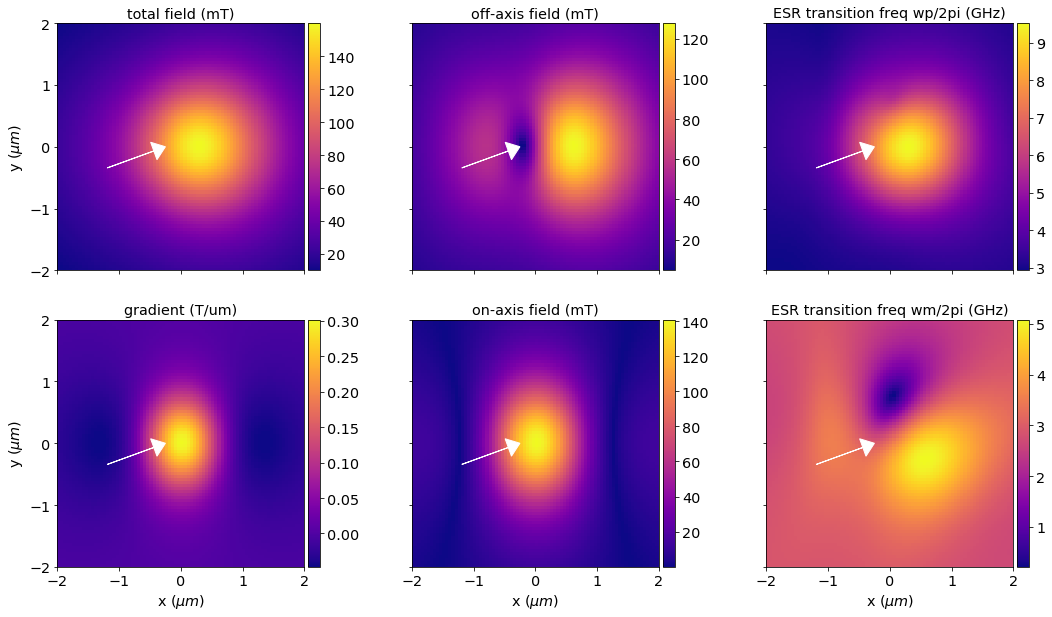

In [136]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':2
}

cmap_name = 'plasma'
nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 5e-3 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

theta_magnet = 54.7
phi_diamond = 135
x, fig = plot_for_certain_angles(theta_magnet, phi_diamond, p, nv_id, n, max_broadening, max_off_axis_field, 
                                cmap_name = cmap_name)
x
fig.savefig('images/optimal_gradient_maps_NV{:d}_100type.jpg'.format(nv_id), transparent=True, bbox_inches="tight")

#### 100 type - ensemble

/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:148: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:150: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:151: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)


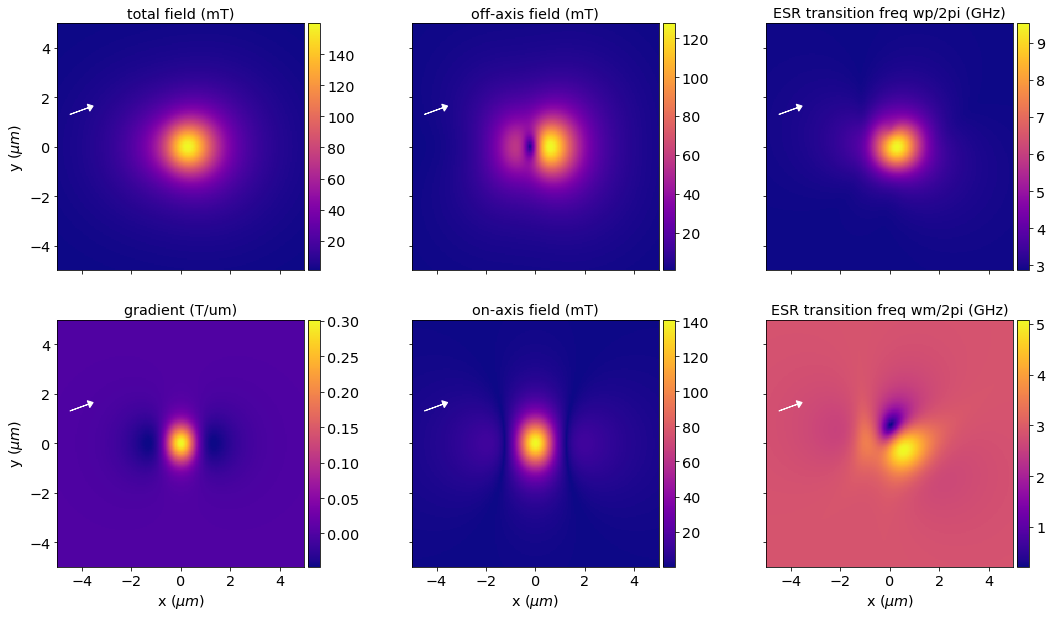

In [137]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':5
}

cmap_name = 'plasma'
nv_id = 0
n = [0,0,1]

max_broadening = 50 # in MHz
max_off_axis_field = 5e-3 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

theta_magnet = 54.7
phi_diamond = 135
x, fig = plot_for_certain_angles(theta_magnet, phi_diamond, p, nv_id, n, max_broadening, max_off_axis_field, 
                                cmap_name = cmap_name)
x
fig.savefig('images/optimal_gradient_maps_NV{:d}_100type_ensemble.jpg'.format(nv_id), transparent=True, bbox_inches="tight")

In [14]:
diamond111_nv_id = 0
s = nv.nNV[nv_id]
print(s)

nv_rot = nv_anal.rotation_matrix_100_to_111(diamond111_nv_id)
s = np.dot(nv_rot, s)
print(s)


nv_angle_theta = np.arctan2(np.sqrt(s[0]**2+s[1]**2),s[2])*180/np.pi
nv_angle_phi = np.arctan2(s[0], s[1])*180/np.pi
nv_angle_phi = nv_angle_phi+360 if nv_angle_phi<0 else nv_angle_phi
print('nv_angle_phi', nv_angle_phi)
print('nv_angle_theta', nv_angle_theta)

[-0.57735027  0.57735027  0.57735027]
[ -5.55111512e-17  -6.91178734e-17   1.00000000e+00]
nv_angle_phi 218.769251298
nv_angle_theta 5.07925335041e-15


/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:148: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  C = C.reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:150: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  X = data['x'].reshape(Ny, Nx)
/Users/rettentulla/PycharmProjects/b26_toolkit/src/data_analysis/fields_plot.py:151: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Y = data['y'].reshape(Ny, Nx)


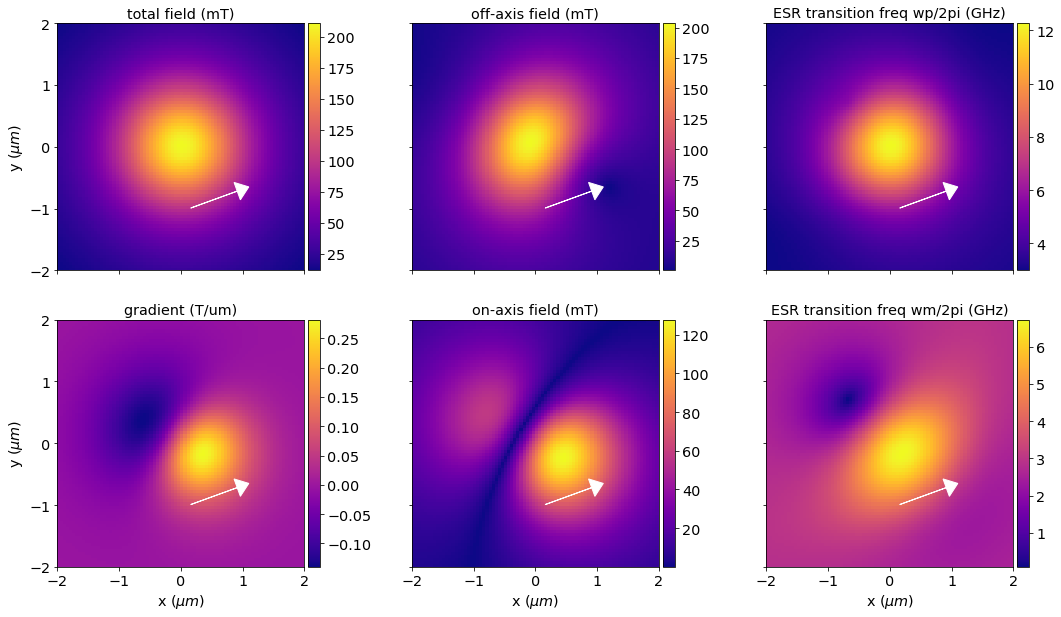

In [138]:
#### 111 type

p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.31666357,
    'phi_m' : 0,
    'theta_m' : -np.arctan(np.sqrt(2))*180/np.pi,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.05,
    'xmax':2
}

cmap_name = 'plasma'
nv_id = 0
n = [0,0,1]

max_broadening = 100000 # in MHz
max_off_axis_field = 5e-3 # in Teslas

theta_mag = np.linspace(0, 180, 2*18+1)
phi_diamond = np.linspace(0, 360, 4*18+1)# rotation of diamond in deg

theta_magnet = 0
phi_diamond = 218.769251298
x, fig = plot_for_certain_angles(theta_magnet, phi_diamond, p, nv_id, n, max_broadening, max_off_axis_field, diamond111_nv_id = 0, cmap_name=cmap_name)
x
fig.savefig('images/optimal_gradient_maps_NV{:d}_111type.jpg'.format(nv_id), transparent=True, bbox_inches="tight")

## gradient in x-y plane for single NV

In [102]:
# nv_id =1 # select a NV [1,2,3,4]

# s= nv.nNV[nv_id-1] # NV orientation 

# # calculate gradent along x
# n = [1,0,0] # direction of gradient
# datax = f.calc_Gradient_single_dipole(p, s, n)
# # calculate gradent along y
# n = [0,1,0] # direction of gradient
# datay = f.calc_Gradient_single_dipole(p, s, n)

# dataz = f.calc_Gradient_single_dipole(p, s, n)

# # now calculate the avrg gradient in xy divided by the gradient in z
# data = datax
# data['G'] = np.sqrt(datax['G']**2+datay['G']**2)/dataz['G']
# fig = fp.plot_G(data, title ='magnetic field gradient NV{:0d} in xy plane'.format(nv_id))

# 5.) Beyond the single dipole, e.g. calculate fields and gradients for 2 dipoles

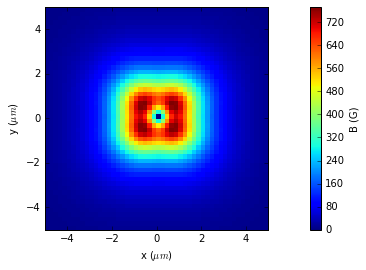

In [8]:
p = {
    'tag':'bead_1',
    'a' : 1.4,
    'Br' : 0.4 ,
    'phi_m' : 90,
    'theta_m' : 90,
    'mu_0' : 4 * np.pi * 1e-7,
    'd_bead_z': 0,
    'dx':0.2,
    'xmax':5
}

s= nv.nNV[nv_id-1] # NV orientation 

# calculate gradent along x
n = [1,0,0] # direction of gradient



# ====== begin ========

# get the positions for which to calculate the field and the magnetic moment
r, M = f.p_to_positions(p)

# two dipoles at x=1 and x=-1 and y=z=0
DipolePositions = np.array([
      [-0.5,0,0],[0.5,0,0]
    ])
# M = np.ones([len(DipolePositions),1])*M
M = np.array([M, -M])

data = f.b_field(r, DipolePositions, M)

fig = fp.plot_Bfield_mag(data)

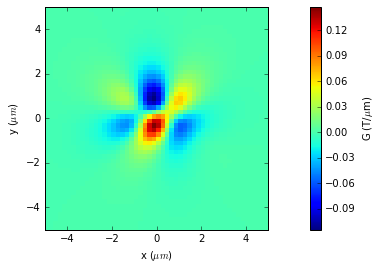

In [9]:
data = f.gradient(r, DipolePositions, M, s, n)

fig = fp.plot_G(data)